<a href="https://colab.research.google.com/github/Ikhtishamanwar/CODSOFT/blob/main/Project_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Processsing

In [59]:
#Load the data from the csv file to pandasDataFrame
titanic_first = pd.read_csv("/content/titanic.csv")

In [60]:
#Printing the first five row
titanic_first.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
#Number of Row And Colums
titanic_first.shape


(891, 12)

In [62]:
#Getting some information about data
titanic_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
#Check The number of missing value in each colums
titanic_first.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

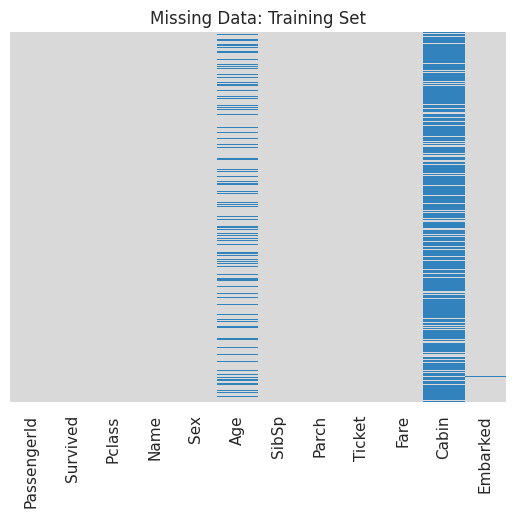

In [64]:
sns.heatmap(titanic_first.isnull(),yticklabels = False, cbar = False,cmap ='tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [65]:
#Drop the cabin Colums from the dataframe
titanic_first.drop('Cabin',axis = 1,inplace =True)

In [66]:
#Replacing the missing values in age colums with mean value
titanic_first['Age'].fillna(titanic_first['Age'].mean(),inplace = True)

In [67]:
print(titanic_first['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [68]:
print(titanic_first['Embarked'].mode()[0])

S


In [69]:
titanic_first['Embarked'].fillna(titanic_first['Embarked'].mode()[0],inplace=True)

In [70]:
titanic_first.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [71]:
titanic_first.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
titanic_first['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data visulization

In [73]:
sns.set()

<Axes: ylabel='count'>

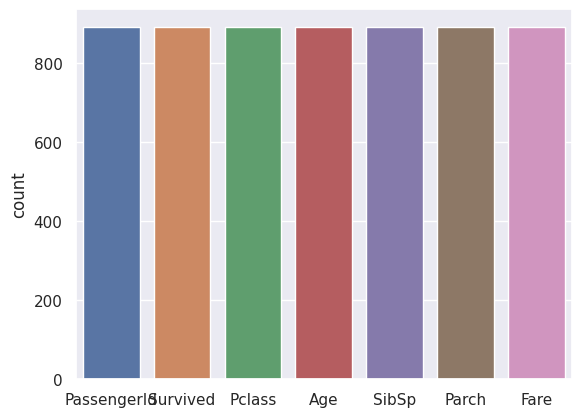

In [74]:
sns.countplot(data=titanic_first)

<Axes: xlabel='Survived', ylabel='count'>

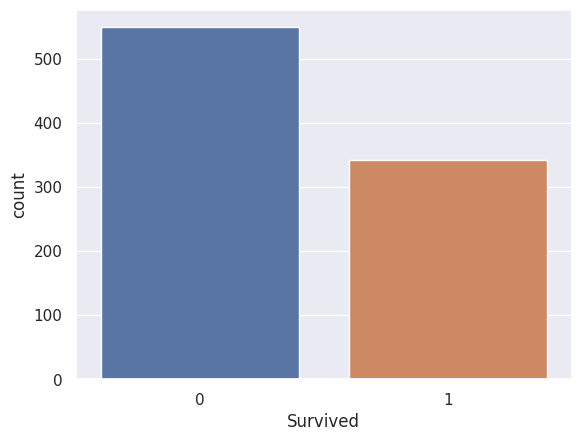

In [75]:
sns.countplot(data=titanic_first, x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

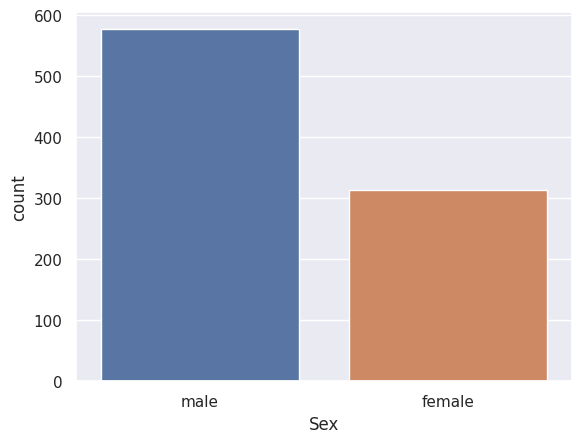

In [76]:
sns.countplot(data=titanic_first, x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

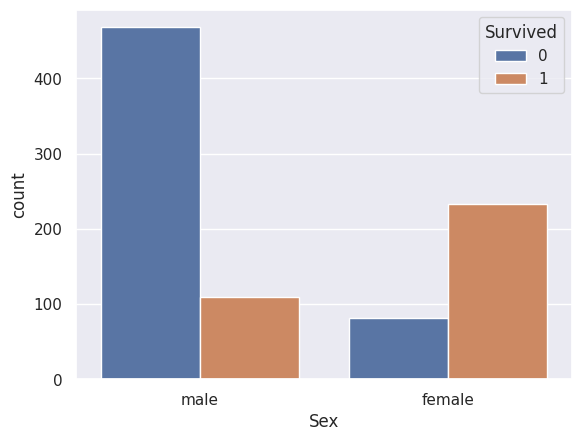

In [77]:
sns.countplot(data=titanic_first, hue= 'Survived', x='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

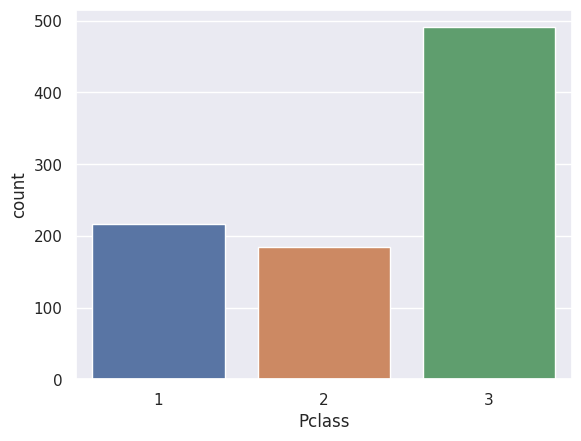

In [78]:
sns.countplot(data=titanic_first, x='Pclass')

In [79]:
titanic_first['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [80]:
titanic_first['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
titanic_first.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)



In [82]:
titanic_first.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [83]:
x = titanic_first.drop(columns=['PassengerId','Name','Ticket','Survived'], axis =1)
y=  titanic_first['Survived']

In [84]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [85]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [86]:
x_train ,x_test,y_train,y_test =train_test_split(x,y, test_size=20,random_state =110)

In [87]:
lreg = LogisticRegression()
lreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_pred_lreg=lreg.predict(x_test)
print(y_pred_lreg)

[0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0]


In [91]:
from sklearn.metrics import classification_report , accuracy_score
print('classification MOdel')

print('--'*30)
logreg_accuracy = round (accuracy_score(y_test,y_pred_lreg)*100,2)
print('Accuracy', logreg_accuracy,'%')

classification MOdel
------------------------------------------------------------
Accuracy 75.0 %
